# **Covid**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

print("Kaggle.json uploaded successfully.")


Saving kaggle.json to kaggle.json
Kaggle.json uploaded successfully.


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research


Dataset URL: https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research
License(s): CC0-1.0
100% 571M/572M [00:27<00:00, 28.0MB/s]
100% 572M/572M [00:27<00:00, 22.1MB/s]


In [ ]:
!unzip /content/covid-cxr-image-dataset-research.zip

Archive:  /content/covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Model,load_model
from keras.layers import Flatten
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
import random
import matplotlib.pyplot as plt
import shutil
import os
import cv2

In [ ]:
#We copied the data so that we can modify it
import os

file_path = '/content/train'

if not os.path.exists(file_path):
    os.makedirs(file_path)
from distutils.dir_util import copy_tree
fromd=r'/content/COVID_IEEE'
to=r'/content/train'
copy_tree(fromd,to)

['/content/train/covid/16660_1_1.jpg',
 '/content/train/covid/EUNT86fWsAE3k1u.jfif',
 '/content/train/covid/EUNPuoiWoAAW435.jfif',
 '/content/train/covid/CASE63_XRAY_1.jpeg',
 '/content/train/covid/ryct.2020200034.fig5-day4.jpeg',
 '/content/train/covid/6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg',
 '/content/train/covid/covid1900346.png',
 '/content/train/covid/EUNQrxvWsAElFV0.jfif',
 '/content/train/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',
 '/content/train/covid/covid1900303.png',
 '/content/train/covid/EURzhIvXsAY5tyz.jfif',
 '/content/train/covid/B2D20576-00B7-4519-A415-72DE29C90C34.jpeg',
 '/content/train/covid/EUNPInyXkAIvcOX.jfif',
 '/content/train/covid/covid-19-pneumonia-12.jpg',
 '/content/train/covid/EUNWUd3XYAAd7s1.jfif',
 '/content/train/covid/covid-19-pneumonia-28.png',
 '/content/train/covid/covid-19-pneumonia-67.jpeg',
 '/content/train/covid/covid1900249.png',
 '/content/train/covid/covid1900432.png',
 '/content/train/covid/gr1_lrg-b.jpg',
 '/conte

## **continue**

In [ ]:
# we splite data to train ,test. validation
if not os.path.isdir(r'/content/valid'):
    os.makedirs(r'/content/valid')
    os.makedirs(r'/content/test')
    for label in os.listdir(r'/content/train'):
        valid_images=random.sample(os.listdir(r'/content/train/'+label),int(len(os.listdir('/content/train/'+label))*.20))
        for image in valid_images:
            if not os.path.isdir(f'/content/valid/{label}'):
                os.makedirs(f'/content/valid/{label}')
            shutil.move(f'/content/train/{label}/{image}',f'/content/valid/{label}')
        test_images=random.sample(os.listdir(r'/content/valid/'+label),int(len(os.listdir('/content/valid/'+label))*.50))

        for image in test_images:
            if not os.path.isdir(f'/content/test/{label}'):
                os.makedirs(f'/content/test/{label}')
            shutil.move(f'/content/valid/{label}/{image}',f'/content/test/{label}')

In [ ]:
train_path = r'/content/train'
valid_path = r'/content/valid'
test_path = r'/content/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=124)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=124)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=124, shuffle=False)

Found 1366 images belonging to 3 classes.
Found 172 images belonging to 3 classes.
Found 170 images belonging to 3 classes.


1.0


0.0


0.0


1.0


0.0


1.0


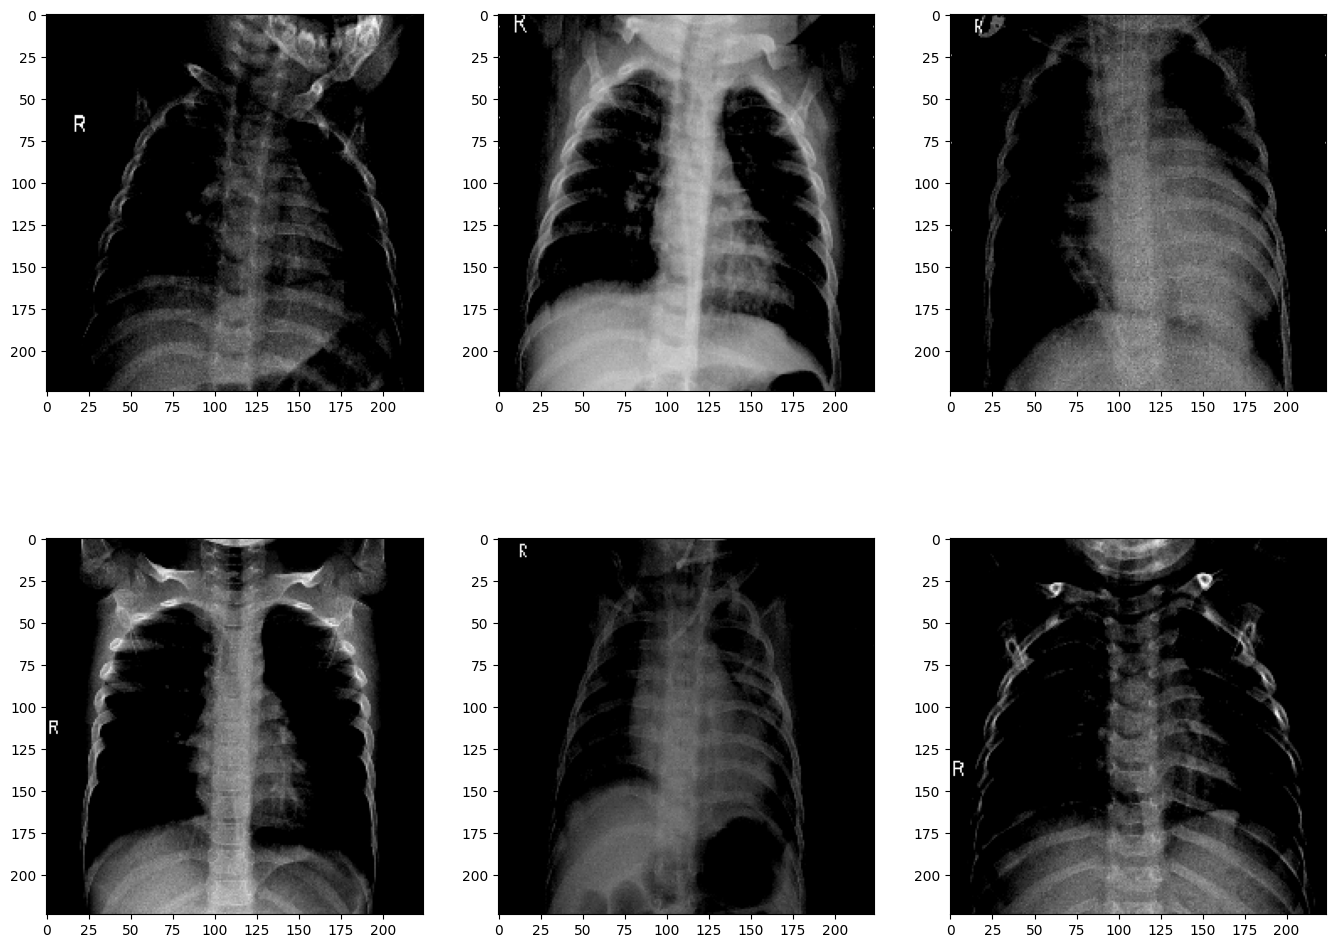

In [ ]:
#imshow some data and labels
fig,axs=plt.subplots(2,3)
for row in range(2):
    for columns in range(3):
        img, label = train_batches.next()
        axs[row,columns].imshow(img[0])
        print(label[0][1])


plt.subplots_adjust(left=0,right=2,bottom=0,top=2)



In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Define directory paths
base_dir = '/content'
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/valid'
test_dir = f'{base_dir}/test'


# Image parameters
IMG_HEIGHT = 224  # or the target height for your CNN
IMG_WIDTH = 224   # or the target width for your CNN
BATCH_SIZE = 32

# Preprocessing for training, validation, and test data (only rescaling)
image_generator = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_data_gen = image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

validation_data_gen = image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

test_data_gen = image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical'
)

# Display class indices
print(train_data_gen.class_indices)


Found 1366 images belonging to 3 classes.
Found 172 images belonging to 3 classes.
Found 170 images belonging to 3 classes.
{'covid': 0, 'normal': 1, 'virus': 2}


In [ ]:
from keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output layer based on your number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=25,  # Adjust the number of epochs as needed
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data_gen, steps=test_data_gen.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc:.2f}')


Epoch 1/25
42/42 [==============================] - 21s 455ms/step - loss: 1.0039 - accuracy: 0.6604 - val_loss: 0.4581 - val_accuracy: 0.8500
Epoch 2/25
42/42 [==============================] - 19s 463ms/step - loss: 0.3410 - accuracy: 0.8816 - val_loss: 0.2591 - val_accuracy: 0.9187
Epoch 3/25
42/42 [==============================] - 19s 451ms/step - loss: 0.1887 - accuracy: 0.9355 - val_loss: 0.1860 - val_accuracy: 0.9250
Epoch 4/25
42/42 [==============================] - 22s 517ms/step - loss: 0.1468 - accuracy: 0.9498 - val_loss: 0.2221 - val_accuracy: 0.9375
Epoch 5/25
42/42 [==============================] - 20s 486ms/step - loss: 0.1192 - accuracy: 0.9543 - val_loss: 0.1641 - val_accuracy: 0.9500
Epoch 6/25
42/42 [==============================] - 19s 461ms/step - loss: 0.0703 - accuracy: 0.9760 - val_loss: 0.1447 - val_accuracy: 0.9625
Epoch 7/25
42/42 [==============================] - 19s 454ms/step - loss: 0.0468 - accuracy: 0.9865 - val_loss: 0.1529 - val_accuracy: 0.9500